<a href="https://colab.research.google.com/github/AniruddhA-Omni/Devspace2022_ps1/blob/main/ps1_devspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/all_matches.csv')

In [ ]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
208037,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.2,Kolkata Knight Riders,Chennai Super Kings,Shivam Mavi,LH Ferguson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208038,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.3,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,Shivam Mavi,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208039,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.4,Kolkata Knight Riders,Chennai Super Kings,Shivam Mavi,LH Ferguson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208040,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.5,Kolkata Knight Riders,Chennai Super Kings,Shivam Mavi,LH Ferguson,...,0,NaN,NaN,NaN,NaN,NaN,caught,Shivam Mavi,NaN,NaN
208041,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.6,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,CV Varun,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.sample()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
90797,598057,2013,2013-05-12,JSCA International Stadium Complex,1,1.5,Royal Challengers Bangalore,Kolkata Knight Riders,CH Gayle,CA Pujara,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Preprocessing

In [ ]:
df.shape

(208042, 22)

In [ ]:
df.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,2.080420e+05,208042.000000,208042.000000,208042.000000,208042.000000,6324.000000,846.000000,547.000000,3288.000000,2.0,0.0,0.0
mean,7.913677e+05,1.483744,9.538335,1.239783,0.066213,1.203985,1.041371,1.829982,1.298358,5.0,NaN,NaN
std,3.212030e+05,0.503388,5.682836,1.610708,0.338622,0.783636,0.356764,1.291837,0.837280,0.0,NaN,NaN
min,3.359820e+05,1.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
25%,5.012420e+05,1.000000,4.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
50%,7.340090e+05,1.000000,9.400000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
75%,1.136584e+06,2.000000,14.400000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0,NaN,NaN
max,1.254117e+06,6.000000,19.900000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0,NaN,NaN


In [ ]:
df.columns.values

array(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208042 entries, 0 to 208041
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                208042 non-null  int64  
 1   season                  208042 non-null  object 
 2   start_date              208042 non-null  object 
 3   venue                   208042 non-null  object 
 4   innings                 208042 non-null  int64  
 5   ball                    208042 non-null  float64
 6   batting_team            208042 non-null  object 
 7   bowling_team            208042 non-null  object 
 8   striker                 208042 non-null  object 
 9   non_striker             208042 non-null  object 
 10  bowler                  208042 non-null  object 
 11  runs_off_bat            208042 non-null  int64  
 12  extras                  208042 non-null  int64  
 13  wides                   6324 non-null    float64
 14  noballs             

In [ ]:
df.isnull().sum()

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     201718
noballs                   207196
byes                      207495
legbyes                   204754
penalty                   208040
wicket_type               197803
player_dismissed          197803
other_wicket_type         208042
other_player_dismissed    208042
dtype: int64

In [ ]:
df.isnull().sum()/df.isnull().count() * 100 # % of null values

match_id                    0.000000
season                      0.000000
start_date                  0.000000
venue                       0.000000
innings                     0.000000
ball                        0.000000
batting_team                0.000000
bowling_team                0.000000
striker                     0.000000
non_striker                 0.000000
bowler                      0.000000
runs_off_bat                0.000000
extras                      0.000000
wides                      96.960229
noballs                    99.593351
byes                       99.737072
legbyes                    98.419550
penalty                    99.999039
wicket_type                95.078398
player_dismissed           95.078398
other_wicket_type         100.000000
other_player_dismissed    100.000000
dtype: float64

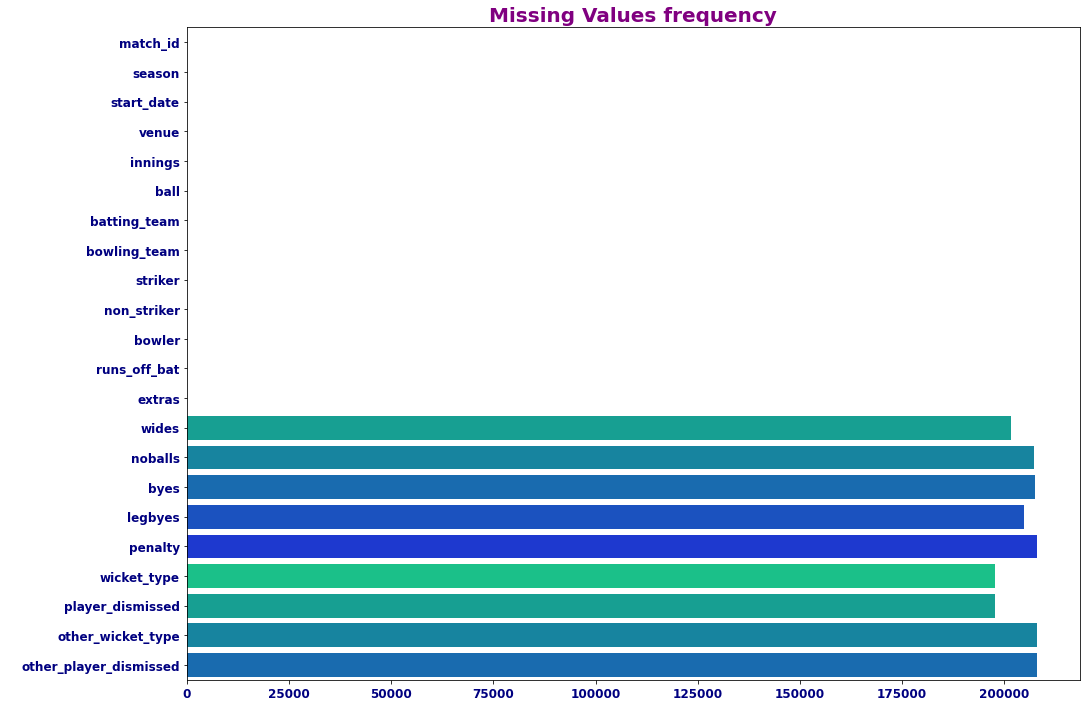

In [ ]:
missing_df = df.isnull().sum().to_frame().reset_index().rename({0: 'missing_val_%'}, axis = 1)
plt.figure(figsize = (16,12))
sns.barplot(data = missing_df, x = 'missing_val_%', y = 'index',palette=sns.color_palette('winter_r'))
plt.title('Missing Values frequency', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks( fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.show();

In [ ]:
df.player_dismissed.fillna('Not Applicable', inplace = True)
df.other_player_dismissed.fillna('Not Applicable', inplace = True)

In [ ]:
df.wides.fillna(0, inplace = True)
df.noballs.fillna(0, inplace = True)
df.byes.fillna(0, inplace = True)
df.legbyes.fillna(0, inplace = True)
df.penalty.fillna(0, inplace = True)

In [ ]:
df.wicket_type.fillna('Not Applicable', inplace = True)
df.other_wicket_type.fillna('Not Applicable', inplace = True)

In [ ]:
df.isnull().sum()/df.isnull().count() * 100 # % of null values

match_id                  0.0
season                    0.0
start_date                0.0
venue                     0.0
innings                   0.0
ball                      0.0
batting_team              0.0
bowling_team              0.0
striker                   0.0
non_striker               0.0
bowler                    0.0
runs_off_bat              0.0
extras                    0.0
wides                     0.0
noballs                   0.0
byes                      0.0
legbyes                   0.0
penalty                   0.0
wicket_type               0.0
player_dismissed          0.0
other_wicket_type         0.0
other_player_dismissed    0.0
dtype: float64

In [ ]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,0.0,0.0,0.0,1.0,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0.0,0.0,0.0,0.0,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,0.0,0.0,0.0,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0.0,0.0,0.0,0.0,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0.0,0.0,0.0,0.0,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [ ]:
print(f"Total Matches Played: {df.match_id.nunique()}\n\nVenues Played At: Total: {df['venue'].nunique()}\
{df['venue'].unique()} \
\n\nTeams : Total: {df['batting_team'].nunique()} {df['batting_team'].unique()}")

Total Matches Played: 876

Venues Played At: Total: 46['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Eden Gardens' 'Wankhede Stadium'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Brabourne Stadium, Mumbai'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 '

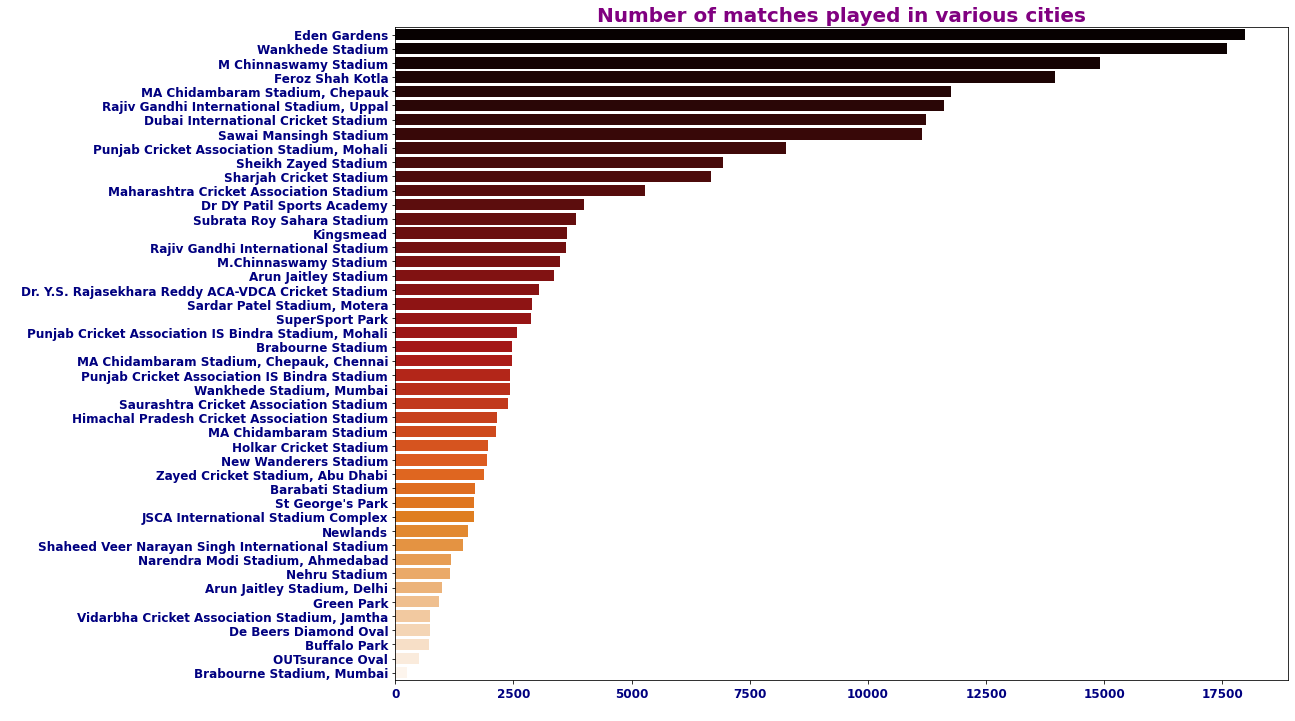

In [ ]:
plt.figure(figsize = (16,12))
order_list = df.venue.value_counts().index.tolist()
sns.countplot(y=df.venue, palette='gist_heat', order = order_list)
plt.title('Number of matches played in various cities', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.show();